<a href="https://colab.research.google.com/github/MayerT1/Confusion_Matrix_Colab/blob/master/Final_ConfusionMatrix_TF_S1_Val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [2]:
%cd /content/notebooks/
!ls

/content/mnt/My Drive/Colab Notebooks
'11_1_19Copy of FSH-hosted-runtime.ipynb'
 11_20_Exercise_1_FSH.ipynb
 11_25_Exercise_1_FSH.ipynb
 1_14_2020_PreProcess_SARData_ISCE.ipynb
 20100923_LaosData.csv
 4_22_Final_ConfusionMatrix.ipynb
 AUC.png
 Biplov_test
 bmaxGeeGrd.png
 bmaxSnapRtc.png
 Clipped_GEDI02_B_2019191143003_O03257_T01491_02_001_01.csv
 Clipped_GEDI02_B_2019198211434_O03370_T02354_02_001_01.csv
 Clipped_GEDI02_B_2019207183831_O03508_T05323_02_001_01.csv
 COLAB_TF_WG_Main_Model_Template_10_17_19
 COLAB_TF_WG_Main_Model_Template_2_14_20
 ConfusionMatrix_4_6_20.ipynb
 ConfusionMatrix.ipynb
'Copy of 04-svm-roc.ipynb'
'Copy of 0: TF2.0 beginner DNN.ipynb'
'Copy of 1_14_2020_PreProcess_SARData_ISCE.ipynb'
'Copy of 1: TF2.0 beginner CNN.ipynb'
'Copy of 2: A Simple Classification using EE.ipynb'
'Copy of 3: A Simple Regression using EE.ipynb'
'Copy of 4: Time Series Prediction using EE.ipynb'
'Copy of 5: TF + GEE + CEO.ipynb'
'Copy of ADPC_1_14_2020_PreProcess_SARData_ISCE.ipynb'
'C

In [3]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import brier_score_loss
from google.colab import files


import pandas as pd
import numpy as np
#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [15]:

#mydataset = pd.read_csv('Sample_Points_CSV_Mya2019_4_9.csv')
#mydataset = pd.read_csv('Sample_Points_CSV_Cam2019_4_9.csv')
#mydataset = pd.read_csv('Sample_Points_CSV_Cam2018_4_9.csv')
mydataset = pd.read_csv('TF_S1_Val_CSV.csv')

display(mydataset)

actual_9_9 = mydataset['WaterPlane_9_9'].dropna()
first_9_9 = mydataset['first_9_9'].dropna()

actual_9_11 = mydataset['WaterPlane_9_11'].dropna()
first_9_11 = mydataset['first_9_11'].dropna()

actual_9_23 = mydataset['WaterPlane_9_23'].dropna()
first_9_23 = mydataset['first_9_23'].dropna()

actual_10_3 = mydataset['WaterPlane_10_3'].dropna()
first_10_3 = mydataset['first_10_3'].dropna()

actual_10_5 = mydataset['WaterPlane_10_5'].dropna()
first_10_5 = mydataset['first_10_5'].dropna()

actual_10_15 = mydataset['WaterPlane_10_15'].dropna()
first_10_15 = mydataset['first_10_15'].dropna()


##Class names for binary analysis
class_names = ['Water', 'Not Water']

,WaterPlane_9_9,first_9_9,WaterPlane_9_11,first_9_11,WaterPlane_9_23,first_9_23,WaterPlane_10_3,first_10_3,WaterPlane_10_5,first_10_5,WaterPlane_10_15,first_10_15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
138,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN


# Data Flipping

In [25]:
##Flips the data through transpose and flip to rearrange the confusion matrix values:(tp, tn, fp, fn) so that it can be emplyed by the the ploting code block below
results_9_9 = confusion_matrix(actual_9_9, first_9_9)
#print("results_9_9", results_9_9)

transposed_results_9_9 = results_9_9.transpose()
#print("transposed_results_9_9", transposed_results_9_9)

final_results_9_9 = np.flip(transposed_results_9_9)
print("final_results_9_9", final_results_9_9)

print("---")

results_9_11 = confusion_matrix(actual_9_11, first_9_11)
#print("results_9_11", results_9_11)

transposed_results_9_11 = results_9_11.transpose()
#print("transposed_results_9_11", transposed_results_9_11)

final_results_9_11 = np.flip(transposed_results_9_11)
print("final_results_9_11", final_results_9_11)

print("---")

results_9_23 = confusion_matrix(actual_9_23, first_9_23)
#print("results_9_23", results_9_23)

transposed_results_9_23 = results_9_23.transpose()
#print("transposed_results_9_23", transposed_results_9_23)

final_results_9_23 = np.flip(transposed_results_9_23)
print("final_results_9_23", final_results_9_23)

print("---")

results_10_3 = confusion_matrix(actual_10_3, first_10_3)
#print("results_10_3", results_10_3)

transposed_results_10_3 = results_10_3.transpose()
#print("transposed_results_10_3", transposed_results_10_3)

final_results_10_3 = np.flip(transposed_results_10_3)
print("final_results_10_3", final_results_10_3)

print("---")

results_10_5 = confusion_matrix(actual_10_5, first_10_5)
#print("results_10_5", results_10_5)

transposed_results_10_5 = results_10_5.transpose()
#print("transposed_results_10_5", transposed_results_10_5)

final_results_10_5 = np.flip(transposed_results_10_5)
print("final_results_10_5", final_results_10_5)

print("---")

results_10_15 = confusion_matrix(actual_10_15, first_10_15)
#print("results_10_15", results_10_15)

transposed_results_10_15 = results_10_15.transpose()
#print("transposed_results_10_15", transposed_results_10_15)

final_results_10_15 = np.flip(transposed_results_10_15)
print("final_results_10_15", final_results_10_15)



final_results_9_9 [[12  0]
 [ 0 14]]
---
final_results_9_11 [[36  0]
 [ 8 75]]
---
final_results_9_23 [[22  0]
 [ 9 72]]
---
final_results_10_3 [[41  2]
 [ 6 90]]
---
final_results_10_5 [[52  0]
 [11 80]]
---
final_results_10_15 [[69  1]
 [11 57]]


# Export Stats

In [23]:
#displays a table of indexed by stat method/algorithm
stat_dict = {"Stat_method":  ["Accuracy Score", "precision_score", "average_precision_score", "cohen_kappa_score", "brier_score_loss", "roc_auc_score", 'f1_score' ],
                        'Edge_9_9':   [accuracy_score(actual_9_9, first_9_9), precision_score(actual_9_9, first_9_9),average_precision_score(actual_9_9, first_9_9), cohen_kappa_score(actual_9_9, first_9_9), brier_score_loss(actual_9_9, first_9_9), roc_auc_score(actual_9_9, first_9_9), f1_score(actual_9_9, first_9_9)],
                        'Edge_9_11':  [accuracy_score(actual_9_11, first_9_11),precision_score(actual_9_11, first_9_11), average_precision_score(actual_9_11, first_9_11), cohen_kappa_score(actual_9_11, first_9_11), brier_score_loss(actual_9_11, first_9_11), roc_auc_score(actual_9_11, first_9_11),f1_score(actual_9_11, first_9_11)],
                        'Edge_9_23':   [accuracy_score(actual_9_23, first_9_23), precision_score(actual_9_23, first_9_23), average_precision_score(actual_9_23, first_9_23),cohen_kappa_score(actual_9_23, first_9_23), brier_score_loss(actual_9_23, first_9_23), roc_auc_score(actual_9_23, first_9_23), f1_score(actual_9_23, first_9_23)],
                        "Edge_10_3":  [accuracy_score(actual_10_3, first_10_3), precision_score(actual_10_3, first_10_3), average_precision_score(actual_10_3, first_10_3), cohen_kappa_score(actual_10_3, first_10_3), brier_score_loss(actual_10_3, first_10_3), roc_auc_score(actual_10_3, first_10_3), f1_score(actual_10_3, first_10_3)],
                        "Edge_10_5":  [accuracy_score(actual_10_5, first_10_5), precision_score(actual_10_5, first_10_5), average_precision_score(actual_10_5, first_10_5), cohen_kappa_score(actual_10_5, first_10_5), brier_score_loss(actual_10_5, first_10_5), roc_auc_score(actual_10_5, first_10_5), f1_score(actual_10_5, first_10_5)],
                        "Edge_10_15":  [accuracy_score(actual_10_15, first_10_15), precision_score(actual_10_15, first_10_15), average_precision_score(actual_10_15, first_10_15), cohen_kappa_score(actual_10_15, first_10_15), brier_score_loss(actual_10_15, first_10_15), roc_auc_score(actual_10_15, first_10_15), f1_score(actual_10_15, first_10_15)],
                        }
stat_dict_output_df = pd.DataFrame(stat_dict)
display(stat_dict_output_df)


print("-")
print( 'classification_report Edge_9_9 :')
print( classification_report(actual_9_9, first_9_9) )
print("-")
print( 'classification_report Edge_9_11 :')
print( classification_report(actual_9_11, first_9_11) )
print("-")
print( 'classification_report Edge_9_23 :')
print( classification_report(actual_9_23, first_9_23) )
print("-")
print( 'classification_report Edge_10_3 :')
print( classification_report(actual_10_3, first_10_3) )
print("-")
print( 'classification_report Edge_10_5 :')
print( classification_report(actual_10_5, first_10_5) )
print("-")
print( 'classification_report Edge_10_15 :')
print( classification_report(actual_10_15, first_10_15) )

,Stat_method,Edge_9_9,Edge_9_11,Edge_9_23,Edge_10_3,Edge_10_5,Edge_10_15
0,Accuracy Score,1.0,0.932773,0.912621,0.942446,0.923077,0.913043
1,precision_score,1.0,1.000000,1.000000,0.953488,1.000000,0.985714
2,average_precision_score,1.0,0.885409,0.797056,0.874932,0.902320,0.929889
3,cohen_kappa_score,1.0,0.850126,0.773626,0.868682,0.840999,0.825684
4,brier_score_loss,0.0,0.067227,0.087379,0.057554,0.076923,0.086957
5,roc_auc_score,1.0,0.909091,0.854839,0.925301,0.912698,0.922629
6,f1_score,1.0,0.900000,0.830189,0.911111,0.904348,0.920000


-
classification_report Edge_9_9 :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

-
classification_report Edge_9_11 :
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        75
         1.0       1.00      0.82      0.90        44

    accuracy                           0.93       119
   macro avg       0.95      0.91      0.92       119
weighted avg       0.94      0.93      0.93       119

-
classification_report Edge_9_23 :
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        72
         1.0       1.00      0.71      0.83        31

    accuracy                           0.91       103
   macro avg       0.

# Confusion Matrix Referencing Flipped data

Confusion matrix, without normalization
[[12  0]
 [ 0 14]]
Confusion matrix, without normalization
[[36  0]
 [ 8 75]]
Confusion matrix, without normalization
[[22  0]
 [ 9 72]]
Confusion matrix, without normalization
[[41  2]
 [ 6 90]]
Confusion matrix, without normalization
[[52  0]
 [11 80]]
Confusion matrix, without normalization
[[69  1]
 [11 57]]


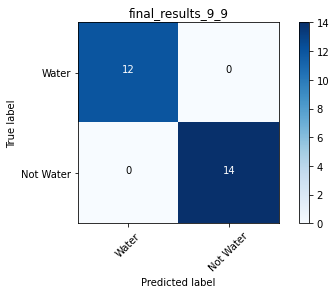

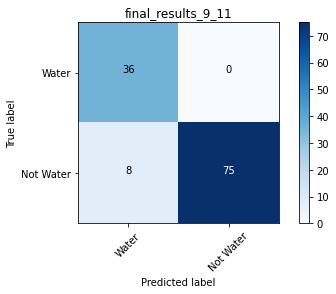

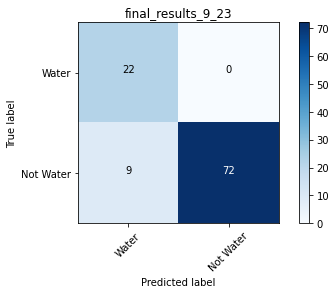

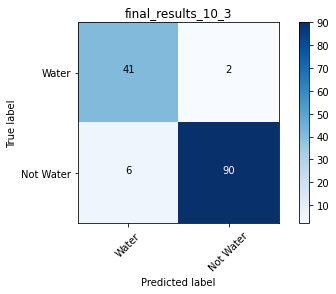

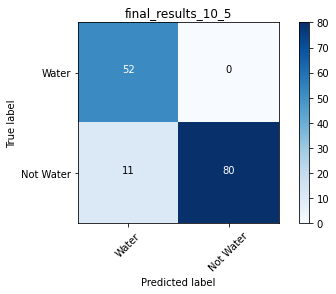

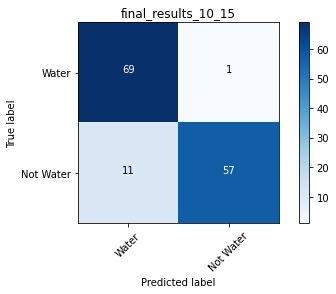

In [26]:
#this code block produces 4 confusion matrices using plot_confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


##code should automatically save the plots as pngs or you can right click them and save as too.

#Plot 
plt.figure()
plot_confusion_matrix(final_results_9_9, classes=class_names,
                      title= 'final_results_9_9')

# fig.savefig('final_results_9_9')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_9_11, classes=class_names,
                      title='final_results_9_11')
# fig.savefig('final_results_9_11')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_9_23, classes=class_names,
                      title='final_results_9_23')
# fig.savefig('final_results_9_23')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_10_3, classes=class_names,
                      title='final_results_10_3')
# fig.savefig('final_results_10_3')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_10_5, classes=class_names,
                      title='final_results_10_5')
# fig.savefig('final_results_10_5')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_10_15, classes=class_names,
                      title='final_results_10_15')
# fig.savefig('final_results_10_15')

plt.savefig("abc.png")
plt.show()